In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("Cleaned_data.csv")
df.head(5)

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize,catergory_mileage,catergory_year,catergory_tax
0,I20,2017.0,7999.0,Manual,17307.0,Petrol,145.0,58.9,1.2,10000>20000,2015>2020,100>150
1,Tucson,2016.0,14499.0,Automatic,25233.0,Diesel,235.0,43.5,2.0,20000>30000,2015>2020,>200
2,Tucson,2016.0,11399.0,Manual,37877.0,Diesel,30.0,61.7,1.7,30000>40000,2015>2020,<100
3,I10,2016.0,6499.0,Manual,23789.0,Petrol,20.0,60.1,1.0,20000>30000,2015>2020,<100
4,IX35,2015.0,10199.0,Manual,33177.0,Diesel,160.0,51.4,2.0,30000>40000,2010>2015,150>200


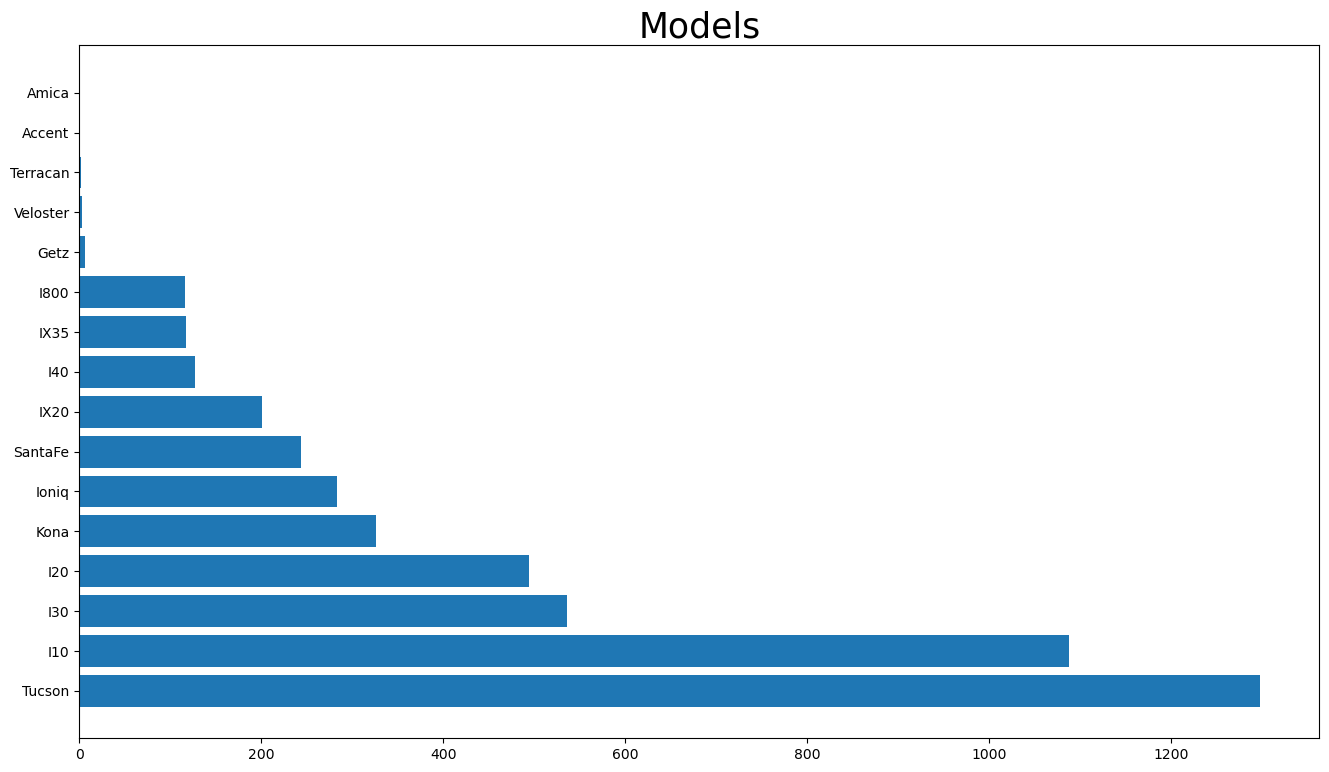

In [3]:
plt.figure(figsize=(16, 9))
model = df['model'].value_counts()
plt.barh(model.index, model, linewidth=3)
plt.xticks(fontsize=10)
plt.title('Models', fontsize=25)
plt.savefig('(3)Models.png',dpi=200)
plt.show()

Transmission

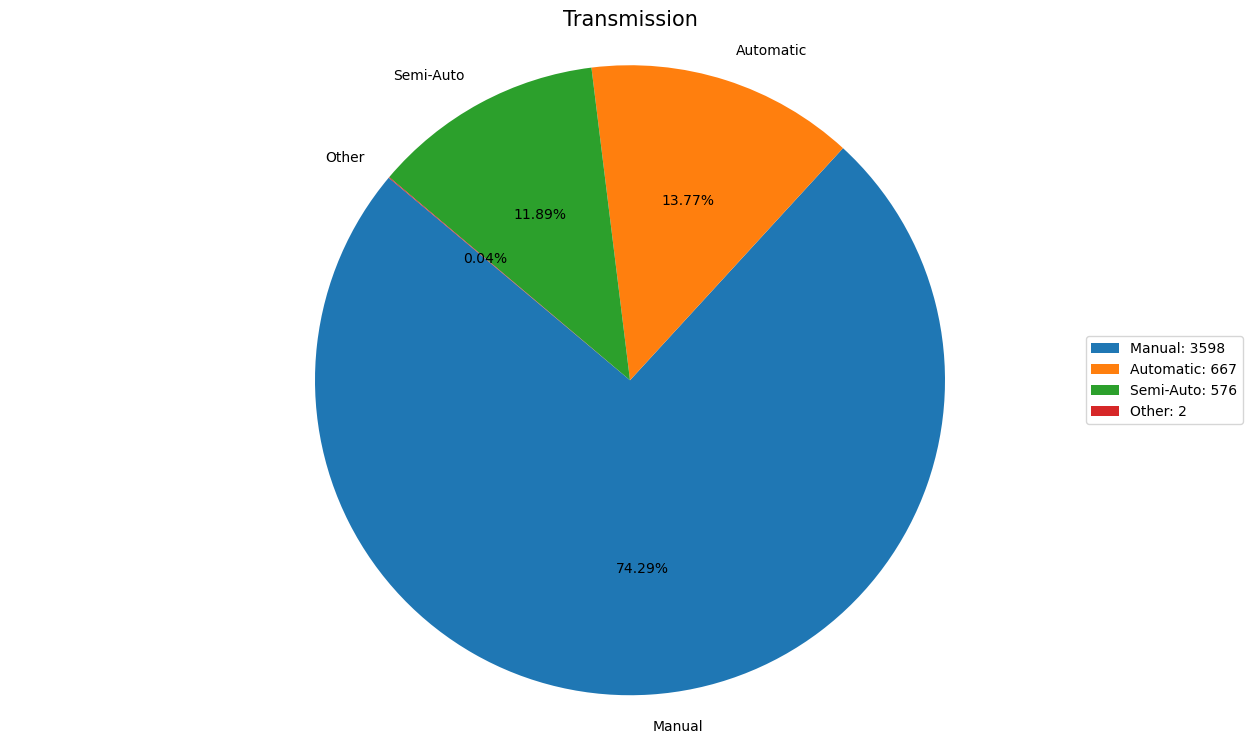

In [4]:
transmission_counts = df['transmission'].value_counts()
plt.figure(figsize=(16, 9))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.2f%%', startangle=140)

plt.legend(loc='right', labels=[f'{label}: {count}' for label, count in zip(transmission_counts.index, transmission_counts)])

plt.title('Transmission', fontsize=15)
plt.axis('equal')
plt.savefig('Transmission.png',dpi=200)
plt.show()

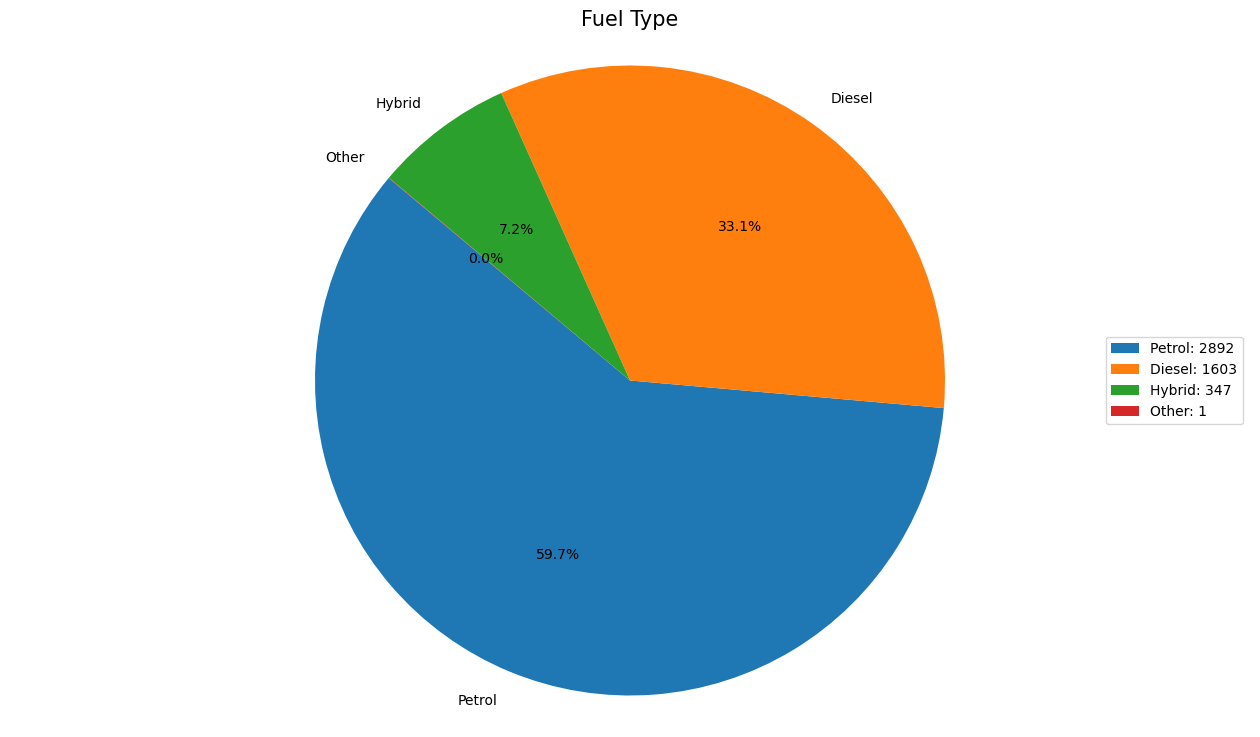

In [5]:

fueltype_counts = df['fuelType'].value_counts()

plt.figure(figsize=(16, 9))
plt.pie(fueltype_counts, labels=fueltype_counts.index, autopct='%1.1f%%', startangle=140)

plt.legend(loc='right', labels=[f'{label}: {count}' for label, count in zip(fueltype_counts.index, fueltype_counts)])

plt.title('Fuel Type', fontsize=15)
plt.axis('equal')
plt.savefig('Fuels.png',dpi=200)
plt.show()

Model + Price

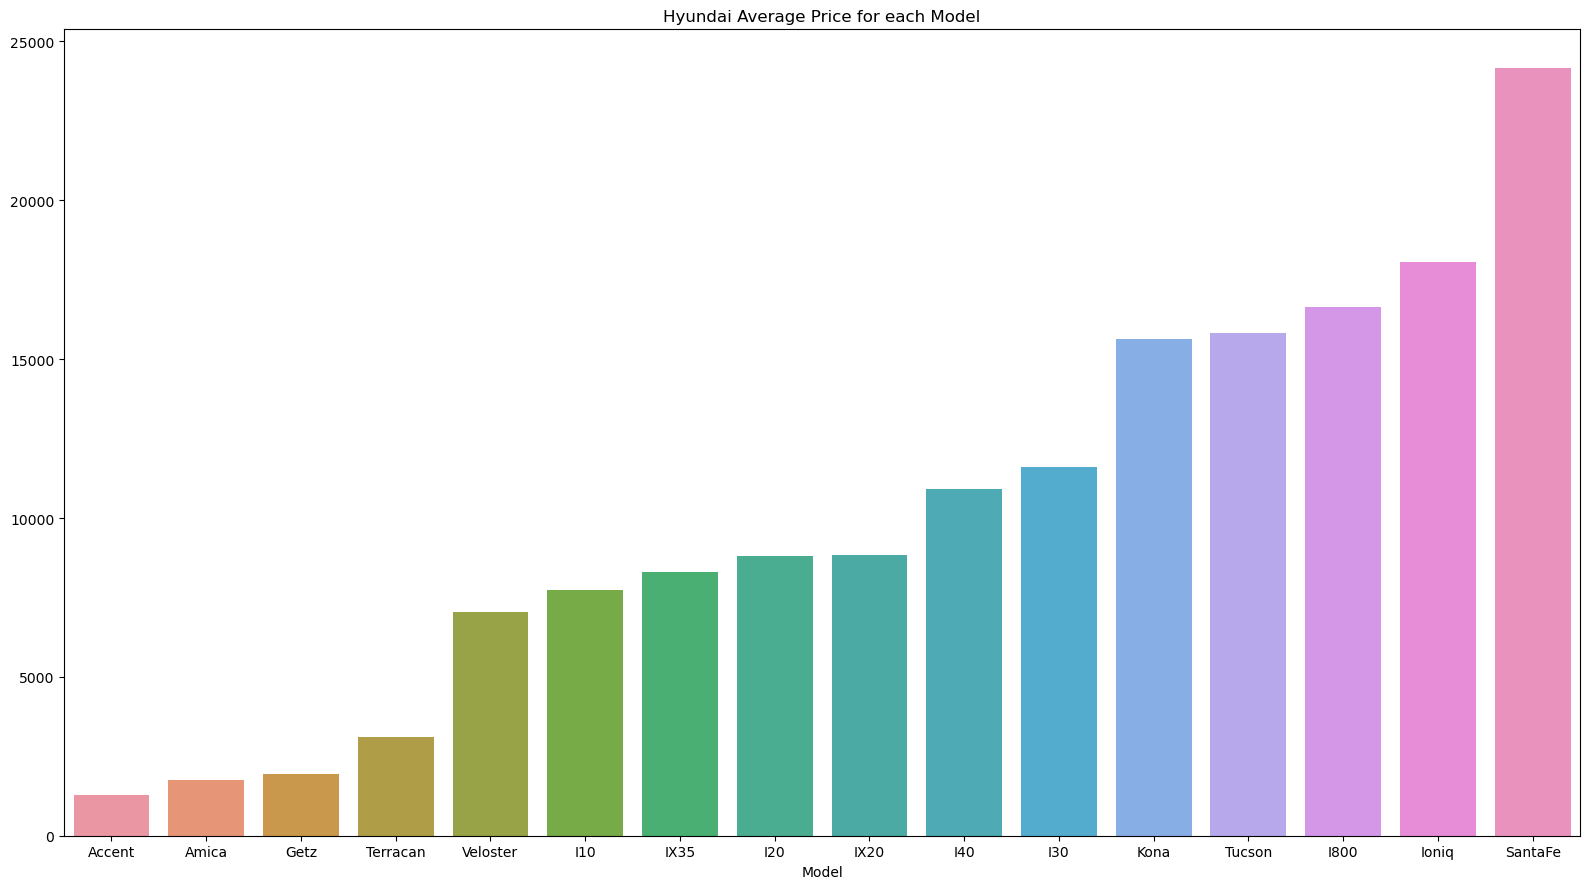

In [6]:
model_price = df.groupby('model')['price'].mean().sort_values()

plt.figure(figsize=(16, 9))
plt.title("Hyundai Average Price for each Model")

sns.barplot(x=model_price.index, y=model_price.values)

plt.xlabel("Model")
plt.savefig('Models_AvgPrice.png',dpi=200)
plt.tight_layout()
plt.show()

Year + Price

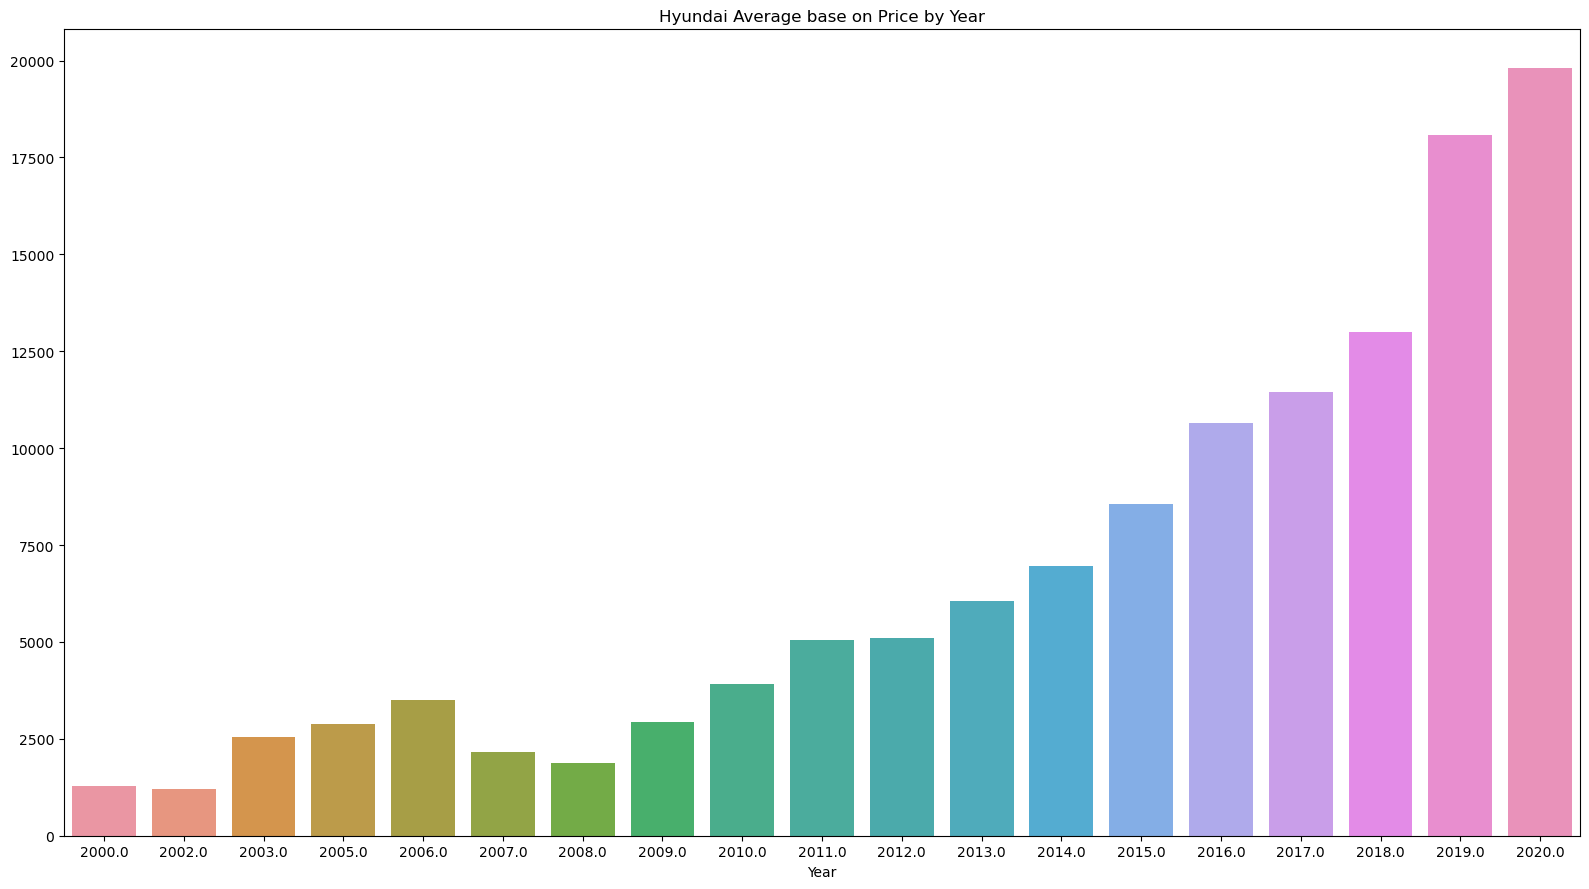

In [7]:
year_price = df.groupby('year')['price'].mean().sort_values()

plt.figure(figsize=(16, 9))
plt.title("Hyundai Average base on Price by Year")

sns.barplot(x=year_price.index, y=year_price.values)

plt.xlabel("Year")
plt.savefig('Year_AvgPrice.png',dpi=200)
plt.tight_layout()
plt.show()

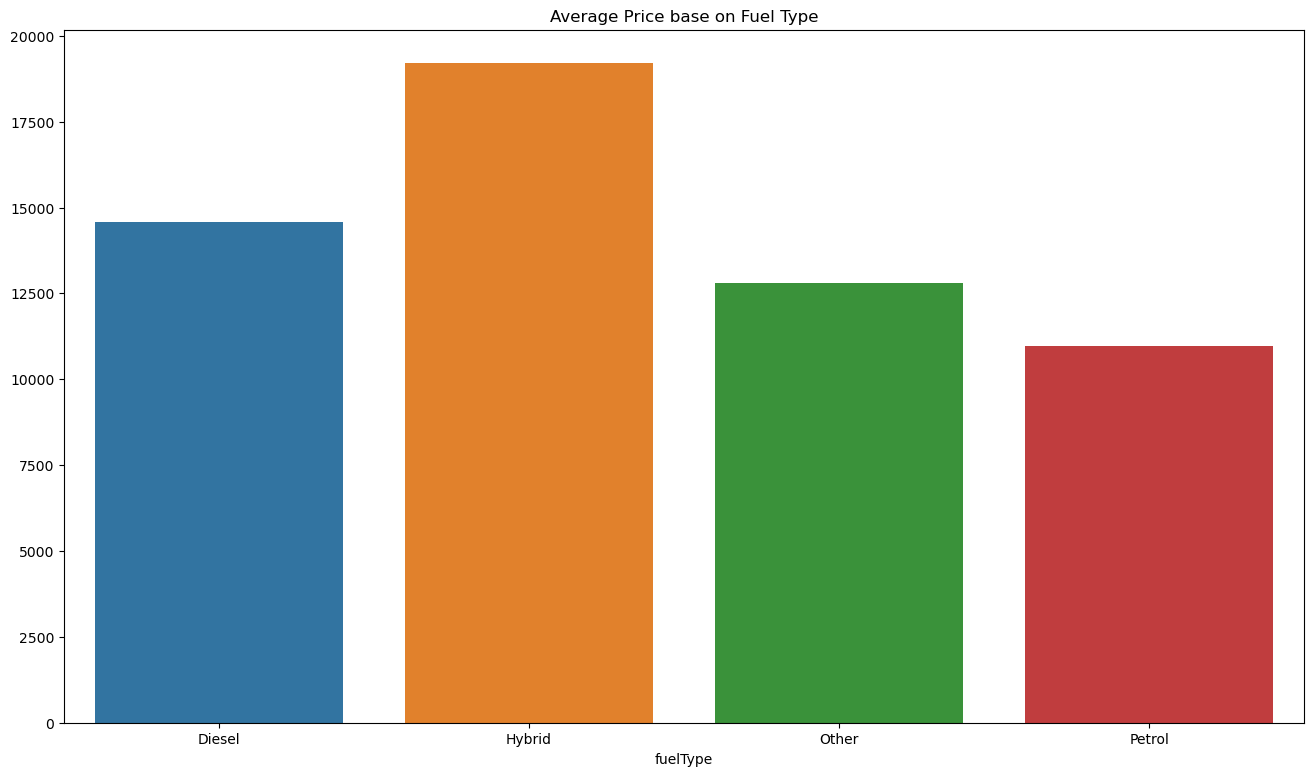

In [8]:
plt.figure(figsize=(16, 9))
transmission_mpg = df.groupby('fuelType')['price'].mean()
plt.title('Average Price base on Fuel Type')
sns.barplot(x=transmission_mpg.index, y=transmission_mpg.values)
plt.savefig('(4)Fuel_AvgPrice.png',dpi=200)
plt.show()


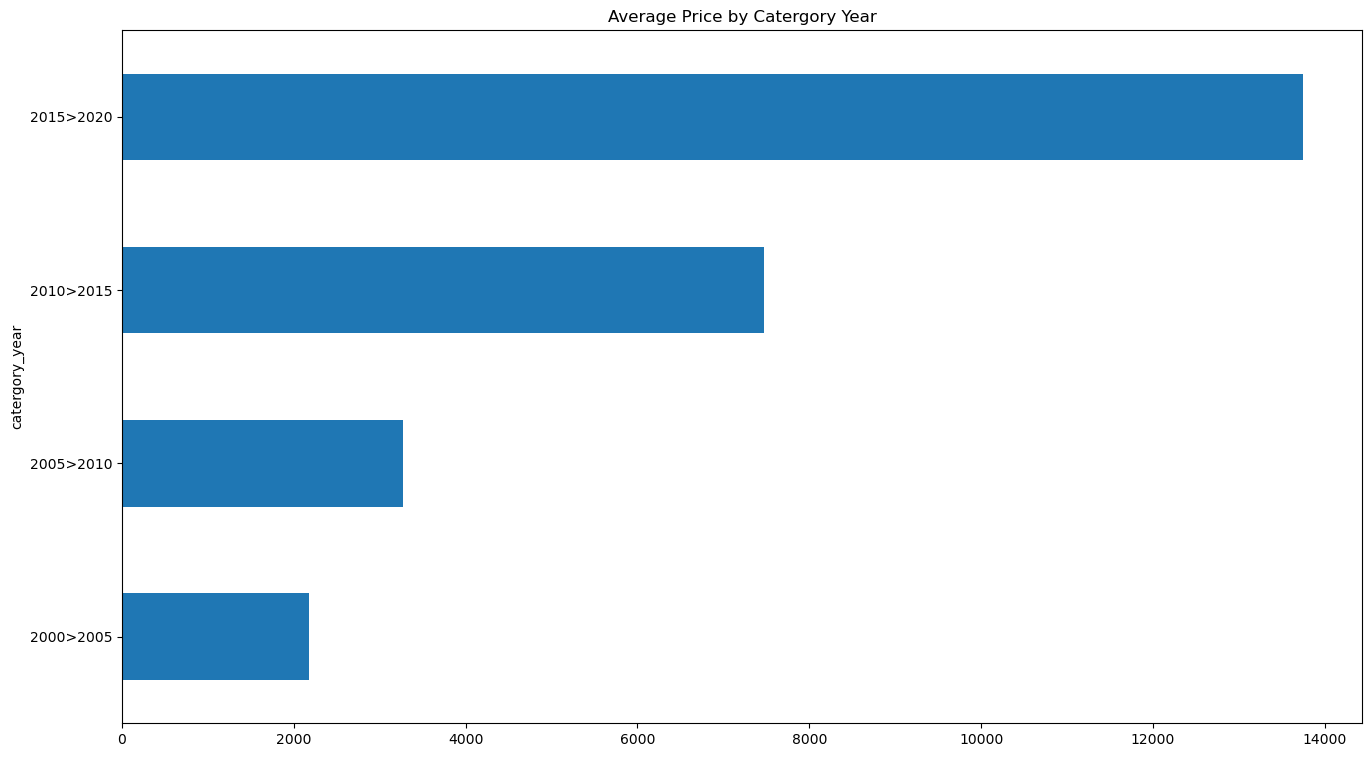

In [9]:
plt.figure(figsize=(16, 9))
transmission_mpg = df.groupby('catergory_year')['price'].mean()
plt.title('Average Price by Catergory Year')
transmission_mpg.plot.barh()
plt.savefig('(2)AvgPrice_Catergory_year.png',dpi=200)
plt.show()


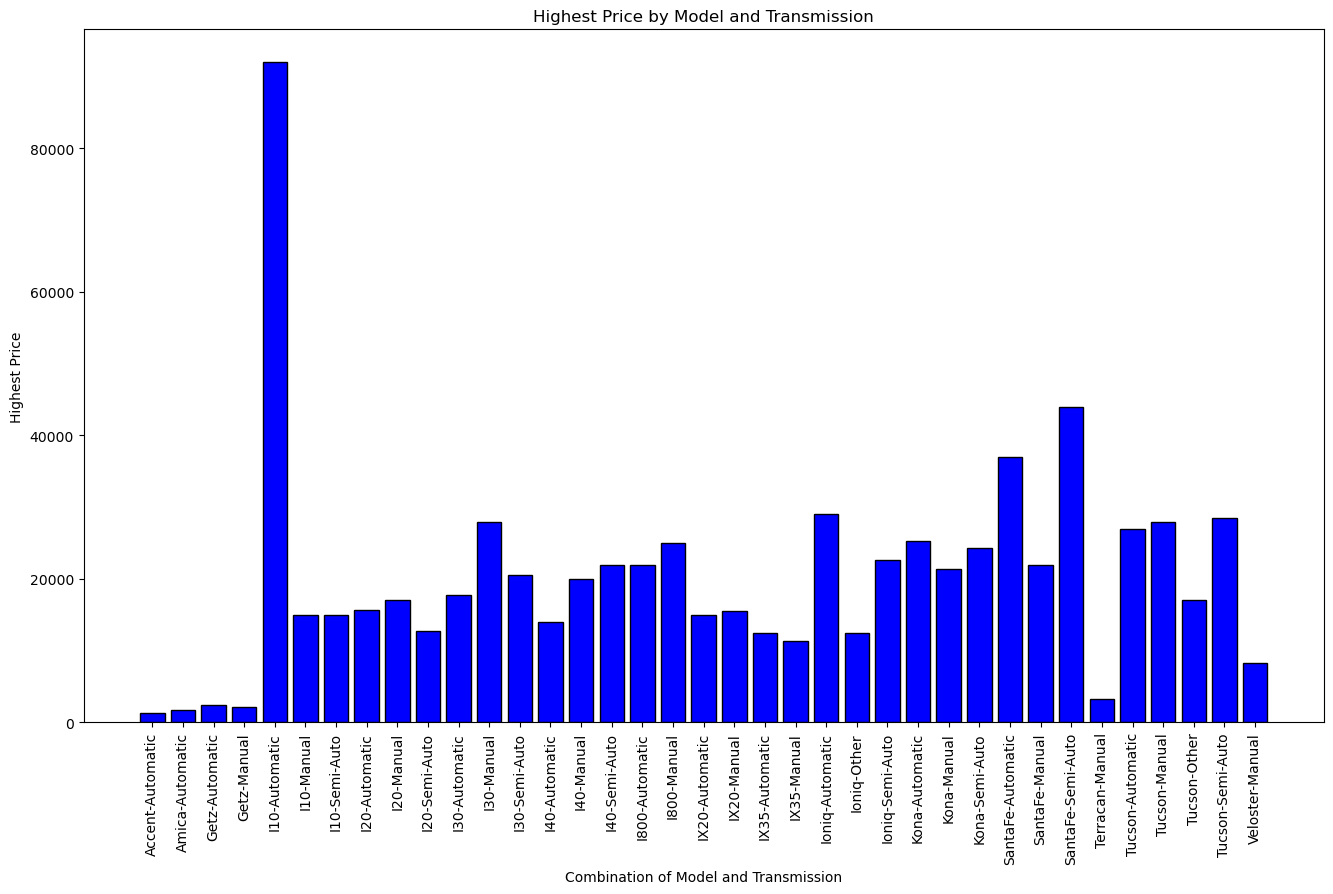

In [10]:
max_prices = df.groupby(['model', 'transmission'])['price'].max().reset_index()


plt.figure(figsize=(16, 9))
plt.bar(max_prices.index, max_prices['price'], color='blue', edgecolor='black')

plt.xlabel('Combination of Model and Transmission')
plt.ylabel('Highest Price')
plt.title('Highest Price by Model and Transmission')
plt.xticks(max_prices.index, [f"{model}-{year}" for model, year in zip(max_prices['model'], max_prices['transmission'])], rotation=90)
plt.savefig('(1)Model Transmission by Highest price.png',dpi=200)
plt.show()

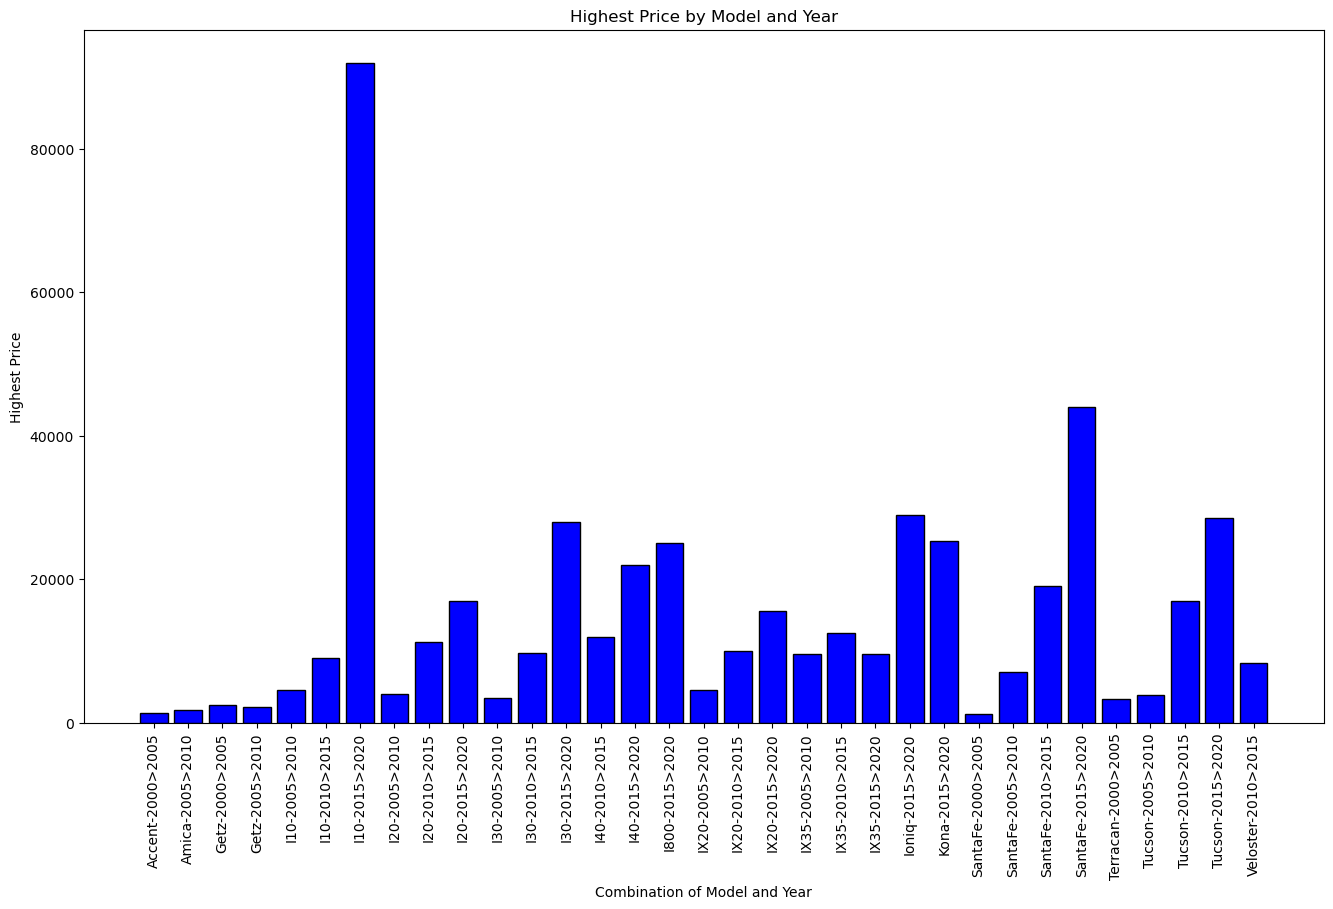

In [11]:
max_prices = df.groupby(['model', 'catergory_year'])['price'].max().reset_index()


plt.figure(figsize=(16, 9))
plt.bar(max_prices.index, max_prices['price'], color='blue', edgecolor='black')

plt.xlabel('Combination of Model and Year')
plt.ylabel('Highest Price')
plt.title('Highest Price by Model and Year')
plt.xticks(max_prices.index, [f"{model}-{year}" for model, year in zip(max_prices['model'], max_prices['catergory_year'])], rotation=90)
plt.savefig('Highest Price by Model and Year.png',dpi=200)
plt.show()

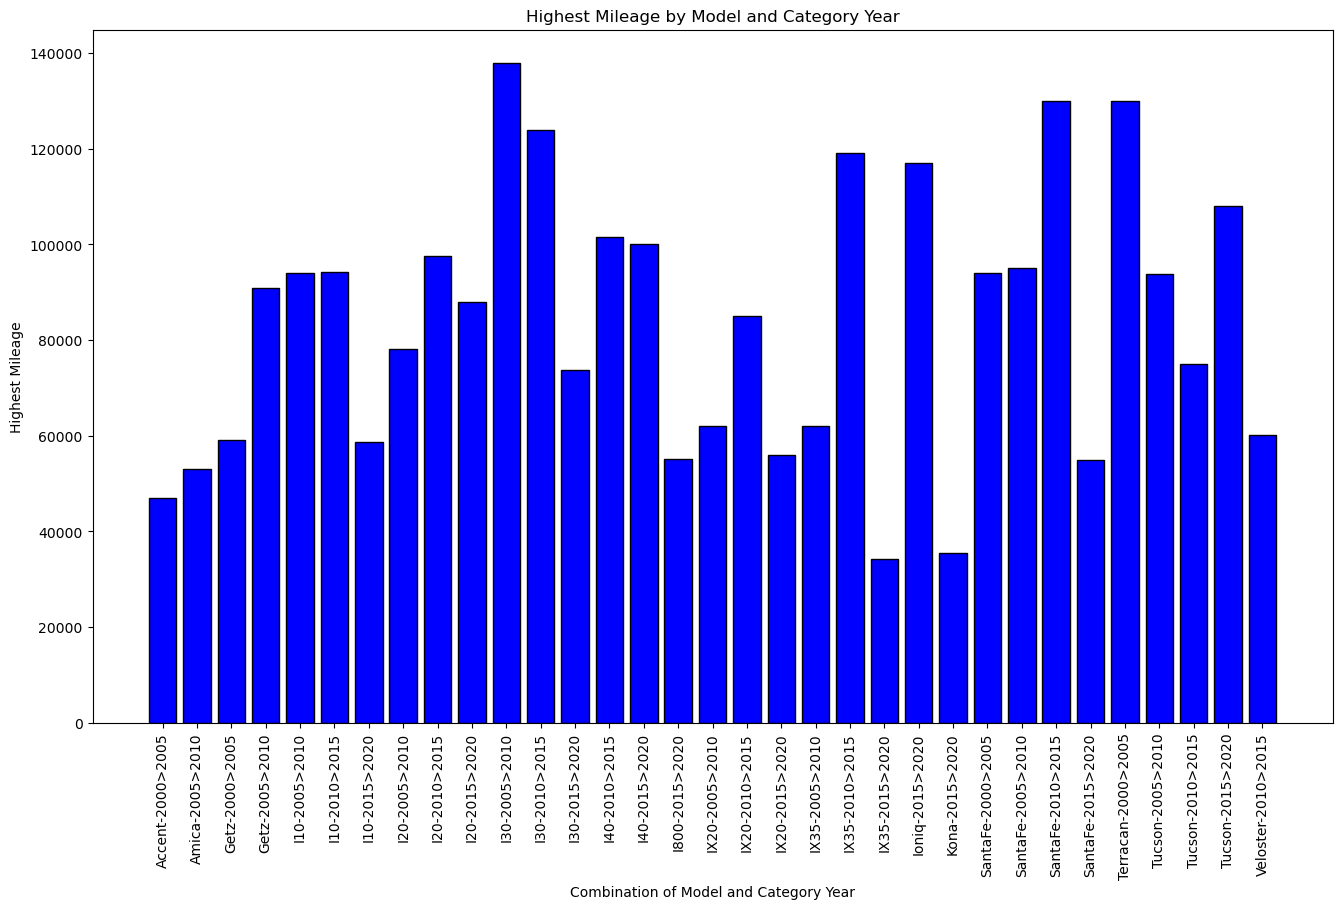

In [12]:
max_mileage = df.groupby(['model', 'catergory_year'])['mileage'].max().reset_index()

plt.figure(figsize=(16, 9))

plt.bar(range(len(max_mileage)), max_mileage['mileage'], color='blue', edgecolor='black')

plt.xticks(range(len(max_mileage)), [f"{model}-{category}" for model, category in zip(max_mileage['model'], max_mileage['catergory_year'])], rotation=90)

plt.xlabel('Combination of Model and Category Year')
plt.ylabel('Highest Mileage')
plt.title('Highest Mileage by Model and Category Year')
plt.savefig('Highest Mileage by Model and Category Year.png',dpi=200)
plt.show()
